# Data exploration

## Objectives
 - Explore the heart.csv dataset and analyze if there is any correlation between the variables

## Inputs
- inputs/datasets/collection/heart.csv

## Outputs
- Have an overview of the feature and check which correlates the most

---

## Setting working Directory
The steps below allow to set heart_attack risk as the new working directory

- get current directory and print it


In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heart_attack_risk/jupyer_notebooks'

- set new working directory as parent of the previous current directory
- As a result heart_attack_risk is the new working directory  

In [4]:
os.chdir(os.path.dirname(current_dir))


## Load dataset

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/heart.csv"))
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


## List of variables
**Age** : The age of the indvidual  [years]

**Sex** : The biological sex of the individual [M: Male, F: Female]

**ChestPainType** : Chest Pain type
- TA: typical angina
- ATA atypical angina
- NAP: non-anginal pain
- ASY: asymptomatic

**RestingBP** : Resting blood pressure (in mm Hg)

**Cholesterol** : serum cholesterol [mm/dl]

**FastingBS** :  fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG** :  resting electrocardiogram results:
- Normal: Normal
- ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**:  exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: Oldpeak refers to the ST segment depression observed on an electrocardiogram (ECG) during exercise.

**ST_slope**: The slope of the ST segment indicates how the ST segment behaves during exercise.
It is categorized into three levels:

- Up: upsloping, 
- Flat: flat, 
- Down: downsloping

**HeartDisease** : [1: heart disease, 0: Normal]

## Data exploration

Analyzing variables distribution, missing data and relevance in business context

In [13]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation study

- Converting categorical variable into numerical

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(918, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Sex_F,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0




- Spearman coefficient assesses the monotonic relationship between variables

In [7]:
corr_spearman = df_ohe.corr(method='spearman')['HeartDisease'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

ST_Slope_Up         -0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_N    -0.494282
ExerciseAngina_Y     0.494282
Oldpeak              0.419046
MaxHR               -0.404827
ChestPainType_ATA   -0.401924
Sex_M                0.305445
Sex_F               -0.305445
Name: HeartDisease, dtype: float64

- ST_Slope, ChestPainType, Exercise angina(exng), oldpeak and maximum heart rate are the variables which correlates the most according to the spearman coefficient

- Pearson coefficient assesses the linear relationship between two variables

In [8]:
corr_pearson = df_ohe.corr(method='pearson')['HeartDisease'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

ST_Slope_Up         -0.622164
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_N    -0.494282
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_M                0.305445
Sex_F               -0.305445
Name: HeartDisease, dtype: float64

- ST_Slope, ChestPainType, Exercise angina(exng), oldpeak and maximum heart rate are the variables which correlates the most according to the spearman coefficient

- Both Spearman and Pearson coefficient highlight the same variables as those which correlates best with the target variable HeartDisease

- Defining the variable which correlates the most

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'ChestPainType_ASY',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up'}

- Set the variables to study

In [10]:
vars_to_study = ['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'MaxHR']
vars_to_study

['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'MaxHR']

## Exploratory Data Analysis (EDA)

- Build a dataframe including only the most important variables


In [11]:
df_eda = df.filter(vars_to_study + ['HeartDisease'])
df_eda.head(3)

,ST_Slope,ChestPainType,ExerciseAngina,Oldpeak,MaxHR,HeartDisease
0,Up,ATA,N,0.0,172,0
1,Flat,NAP,N,1.0,156,1
2,Up,ATA,N,0.0,98,0


### Variables Distribution by Heart Attack risk

- plot the distribution (numerical and categorical) coloured by heart attack risk

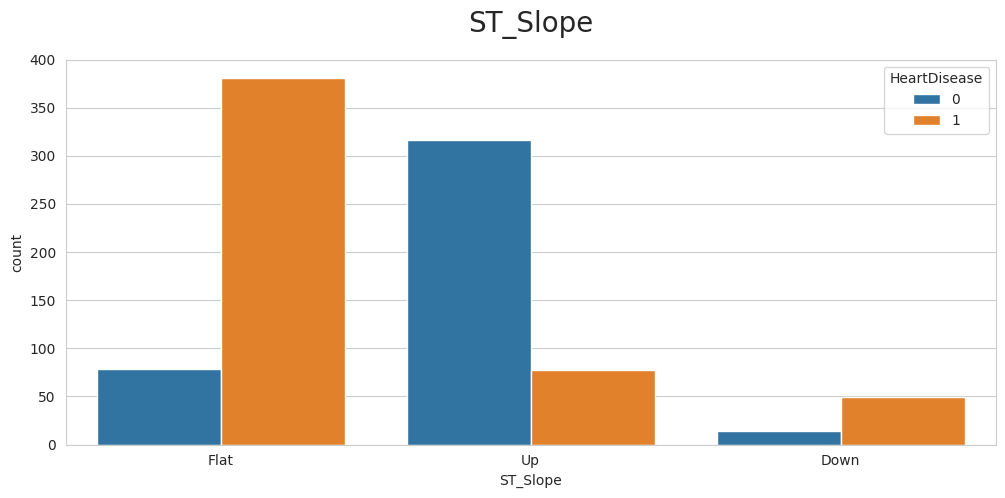

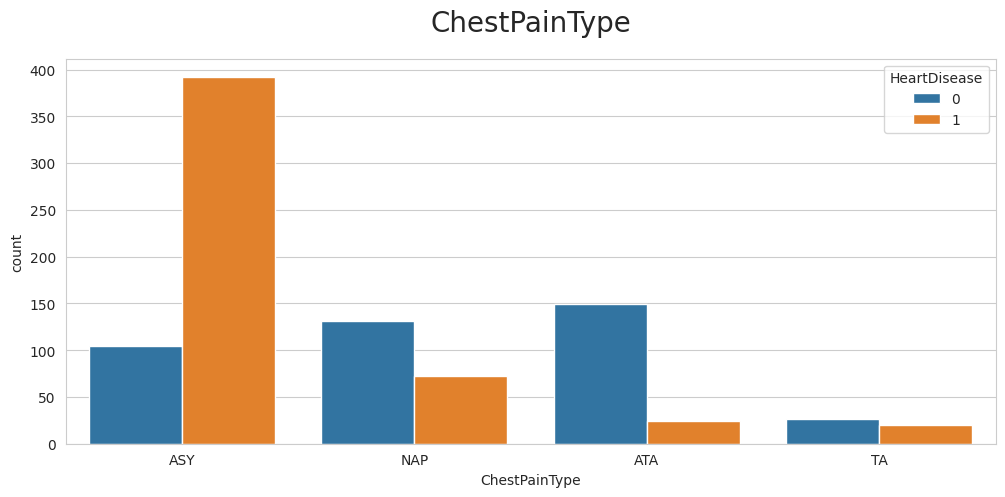

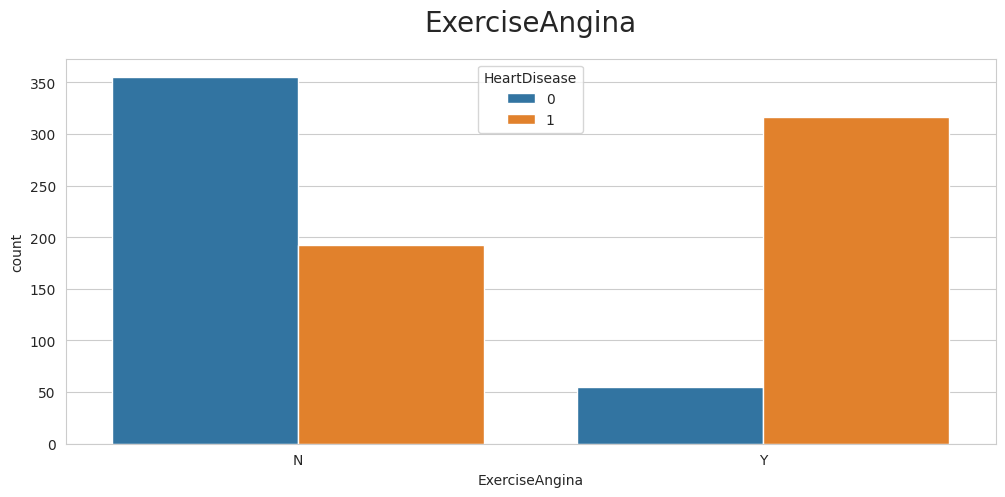

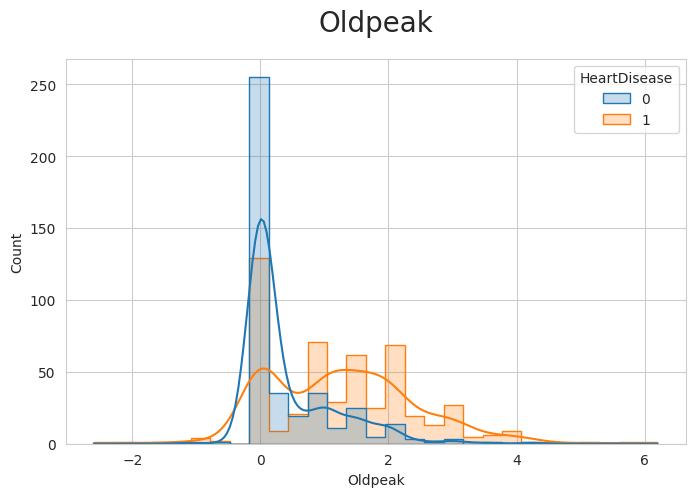

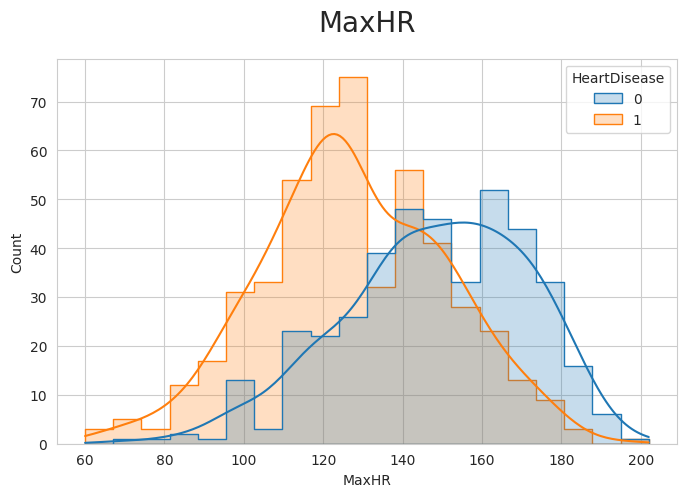

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks()
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

# def plot_based_on_unique_values(df, col, target_var):
#     if df[col].nunique() < 6:
#         plot_categorical(df, col, target_var)
#     else:
#         plot_numerical(df, col, target_var)


target_var = 'HeartDisease'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")
    